# Coping with Dimensionality

# Topics

- The curse of dimensionality
- Principal Component Analysis
- Singular Value Decomposition
- Latent Dirichlet Analysis

## Where are we?

![is there a 4th dimension?](assets/linear-regression/machine-learning-cheet-sheet.png)

(image: [sas.com](https://www.sas.com/en_us/insights/analytics/machine-learning.html))

# Visualizing data

Humans can't visualize data in more than 3-D

# The curse of dimensionality

- As number of dimensions increase, need exponentially more data to create a generalized model

- $d$ dimensions, $v$ target values: $O(v^d)$ examples

# Dimension Reduction

### Objective
"Project" data from high dimensions to lower dimensions

There will be data loss, but should be within acceptable limits

# Techniques to reduce dimensions

- Principal Component Analysis (PCA)
- Singular Value Decomposition (SVD)
- Latent Dirichlet Analysis


# Principal Component Analysis

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

# Singular Value Decomposition

# Latent Dirichlet Analysis

https://archive.ics.uci.edu/ml/datasets/Motion+Capture+Hand+Postures

In [21]:
import pandas as pd

df = pd.read_csv('C:/Users/issohl/Downloads/Postures/Postures.csv')
df = df.apply(pd.to_numeric, errors='coerce')
df.head(10)

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,0,55.581184,71.641201,-63.703137,34.850565,81.352041,-54.747443,77.078512,42.548245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,0,34.522824,81.457317,-54.900995,55.827687,71.878788,-63.194368,86.902653,68.312680,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,0,61.621550,10.968187,-69.134037,32.678173,81.172874,-56.994362,86.732368,68.308089,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,0,61.401356,11.014961,-69.379418,32.527643,81.127660,-57.092473,86.421066,68.405649,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
X = df.loc[:, 'X0':]
y = df['Class']
target_names = y.unique()
n_classes = len(target_names)

In [43]:
# impute missing values because PCA can't handle it
# can't just dropna() because some classes will have no coverage
#
# http://scikit-learn.org/dev/auto_examples/plot_missing_values.html

# This will be deprecated and replaced by sklearn.impute.SimpleImputer
# in future versions of sklearn
from sklearn.preprocessing import Imputer

imputer = Imputer()
X = imputer.fit_transform(X)

In [44]:
# http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

pca = PCA(n_components=2)
X_r = pca.fit(X, y).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

In [45]:
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [0.15978867 0.07685237]


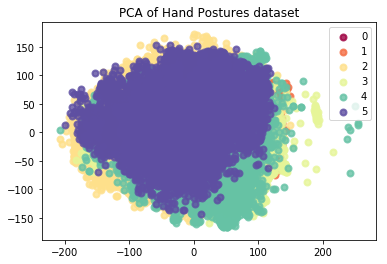

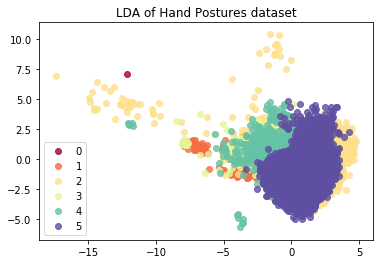

In [48]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, n_classes)]
lw = 2

for color, i, target_name in zip(colors, range(n_classes), target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Hand Postures dataset')

plt.figure()
for color, i, target_name in zip(colors, range(n_classes), target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of Hand Postures dataset')

plt.show()